## Question:

### Implement Linear Regression using Batch and Stochastic Gradient Descent on the Iris Dataset

In this task, you are required to implement Linear Regression using both **Batch Gradient Descent** and **Stochastic Gradient Descent** algorithms. Your program should:

1. **Load the Iris Dataset:**
   - Select two features: **Petal Length** and **Petal Width**.
   
2. **Normalize the Features:**
   - Apply **Min-Max Scaling** to normalize the features to a range between 0 and 1.

3. **Implement the Gradient Descent Algorithms:**
   - Implement **Batch Gradient Descent** to estimate the model parameters.
   - Implement **Stochastic Gradient Descent** to estimate the model parameters.

4. **Train the Model and Estimate Parameters:**
   - Train the linear regression model using both **Batch Gradient Descent** and **Stochastic Gradient Descent**.
   - Estimate the model parameters (coefficients).

5. **Evaluate the Model Performance:**
   - Use the following metrics to evaluate the performance of the model:
     - **Mean Absolute Error (MAE)**
     - **Mean Squared Error (MSE)**
     - **Root Mean Squared Error (RMSE)**
     - **R² (Coefficient of Determination)**
     - **Adjusted R²**

6. **Visualize the Cost Function Convergence:**
   - Plot the convergence of the cost function over iterations for both **Batch Gradient Descent** and **Stochastic Gradient Descent**.

Ensure that the code is well-structured and commented. Provide explanations where necessary.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
X = data[['petal length (cm)', 'petal width (cm)']].values
y = data['petal length (cm)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
def batch_gradient_descent(X, y, alpha=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    for _ in range(epochs):
        y_pred = np.dot(X, theta)
        error = y_pred - y
        gradient = (1/m) * np.dot(X.T, error)
        theta -= alpha * gradient
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)
    return theta, cost_history

In [4]:
def stochastic_gradient_descent(X, y, alpha=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    for _ in range(epochs):
        for i in range(m):
            y_pred = np.dot(X[i], theta)
            error = y_pred - y[i]
            gradient = error * X[i]
            theta -= alpha * gradient
            cost = (1/(2*m)) * np.sum((np.dot(X, theta) - y)**2)
            cost_history.append(cost)
    return theta, cost_history

In [6]:
theta_batch, cost_batch = batch_gradient_descent(X_train, y_train, alpha=0.01, epochs=1000)
theta_stochastic, cost_stochastic = stochastic_gradient_descent(X_train, y_train, alpha=0.01, epochs=1000)

y_pred_batch = np.dot(X_test, theta_batch)
y_pred_stochastic = np.dot(X_test, theta_stochastic)

mae_batch = mean_absolute_error(y_test, y_pred_batch)
mse_batch = mean_squared_error(y_test, y_pred_batch)
rmse_batch = np.sqrt(mse_batch)
r2_batch = r2_score(y_test, y_pred_batch)
adj_r2_batch = 1 - (1 - r2_batch) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

mae_stochastic = mean_absolute_error(y_test, y_pred_stochastic)
mse_stochastic = mean_squared_error(y_test, y_pred_stochastic)
rmse_stochastic = np.sqrt(mse_stochastic)
r2_stochastic = r2_score(y_test, y_pred_stochastic)
adj_r2_stochastic = 1 - (1 - r2_stochastic) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f"Batch GD - MAE: {mae_batch}, MSE: {mse_batch}, RMSE: {rmse_batch}, R2: {r2_batch}, Adj R2: {adj_r2_batch}")
print(f"Stochastic GD - MAE: {mae_stochastic}, MSE: {mse_stochastic}, RMSE: {rmse_stochastic}, R2: {r2_stochastic}, Adj R2: {adj_r2_stochastic}")

Batch GD - MAE: 0.5555076925891448, MSE: 0.42651831398530965, RMSE: 0.6530836960032839, R2: 0.8698603283146208, Adj R2: 0.8602203526342224
Stochastic GD - MAE: 0.39747488528524894, MSE: 0.277410633692604, RMSE: 0.5266978580672262, R2: 0.9153562048638504, Adj R2: 0.9090862941130244


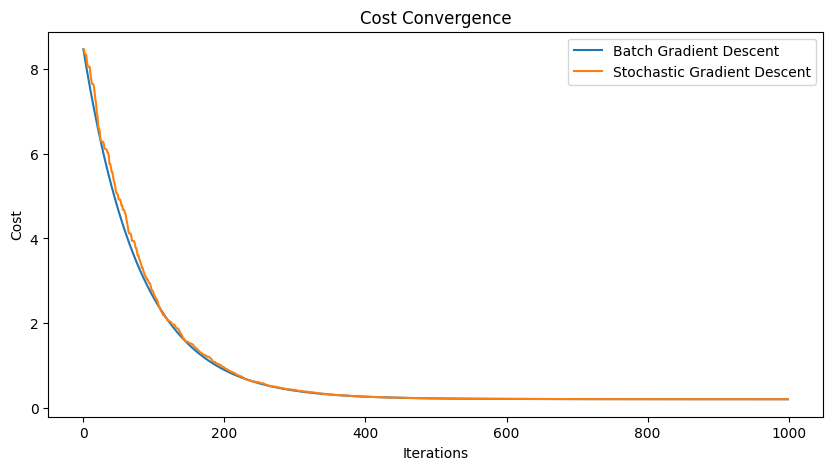

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(cost_batch, label="Batch Gradient Descent")
plt.plot(cost_stochastic[:len(cost_batch)], label="Stochastic Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Convergence")
plt.legend()
plt.show()